# Análisis de componentes principales (PCA) y reducción de dimensionalidad

Este sirve para reducir la cantidad de variables que tiene un modelo cuando este es un número grande con la técnica de reducción de dimensionalidad.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
iris = sns.load_dataset('iris')

In [5]:
scaler = StandardScaler()
scaled = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
cov = np.cov(scaled.T)

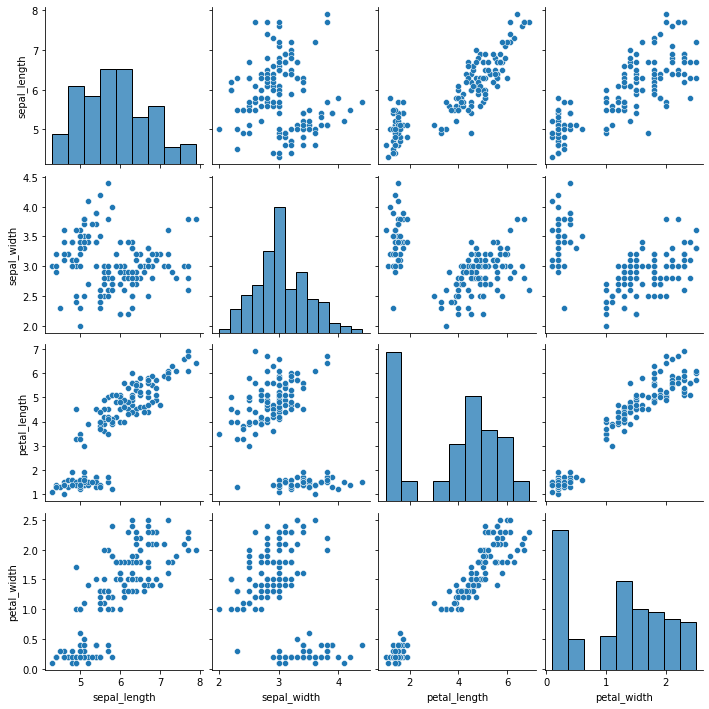

In [7]:
sns.pairplot(iris)

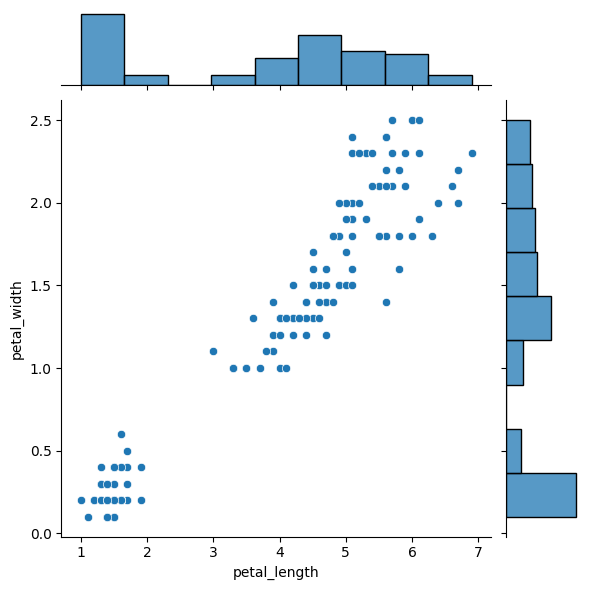

In [9]:
sns.jointplot(data = iris,
              x = 'petal_length',
              y = 'petal_width')
plt.show()

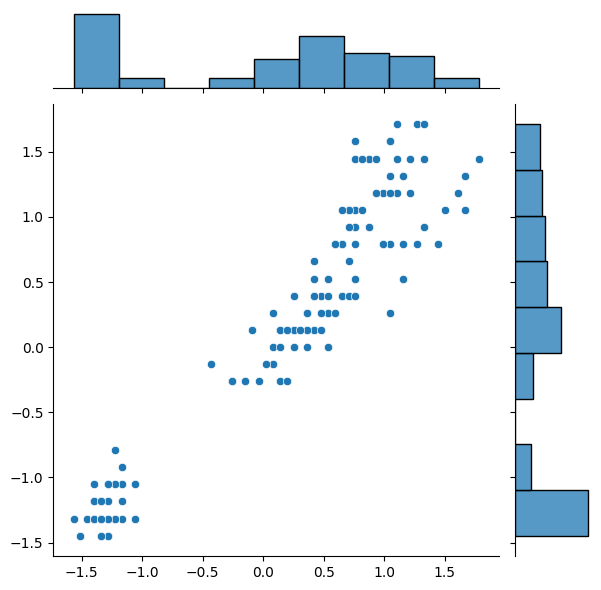

In [11]:
sns.jointplot(x = scaled[:, 2],
              y = scaled[:, 3])
plt.show()

In [17]:
eigen_values, eigen_vectors = np.linalg.eig(cov)

In [18]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [19]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [28]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)  

In [29]:
variance_explained

[72.96244541329987, 22.850761786701774, 3.668921889282877, 0.51787091071548]

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components = 2)
pca.fit(scaled)

PCA(n_components=2)

In [25]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [26]:
reduced_scaled = pca.transform(scaled)

In [27]:
reduced_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [30]:
iris['pca_1'] = reduced_scaled[:, 0]
iris['pca_2'] = reduced_scaled[:, 1]

In [31]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835


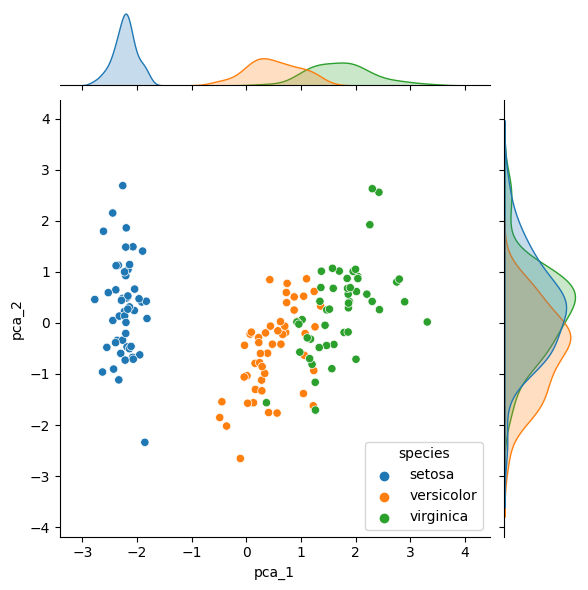

In [32]:
sns.jointplot(data = iris,
              x = 'pca_1',
              y = 'pca_2',
              hue = 'species')
plt.show()